In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from koala import pointsets
from matplotlib import pyplot as plt
from koala import voronization
from koala import plotting
from koala.lattice import cut_boundaries


In [2]:
from koala.example_graphs import *

points1 = pointsets.generate_random(50)
points2 = pointsets.generate_bluenoise(30,3,3)

graphs = [
    tri_square_pent(),
    two_tri(),
    tutte_graph(),
    n_ladder(6,True),
    bridge_graph(),
    voronization.generate_lattice(points2),
    cut_boundaries(voronization.generate_lattice(points2), [False,True]),
    cut_boundaries(voronization.generate_lattice(points2), [True,True]),
    generate_honeycomb(8),
    cut_boundaries(generate_honeycomb(8), [False,True]),
    cut_boundaries(generate_honeycomb(8), [True,True]),
    concave_plaquette()
]




/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_54644/3583999739.py:15: DeprecationWarning: Call to deprecated function plot_lattice.
  plotting.plot_lattice(graphs[n], ax)


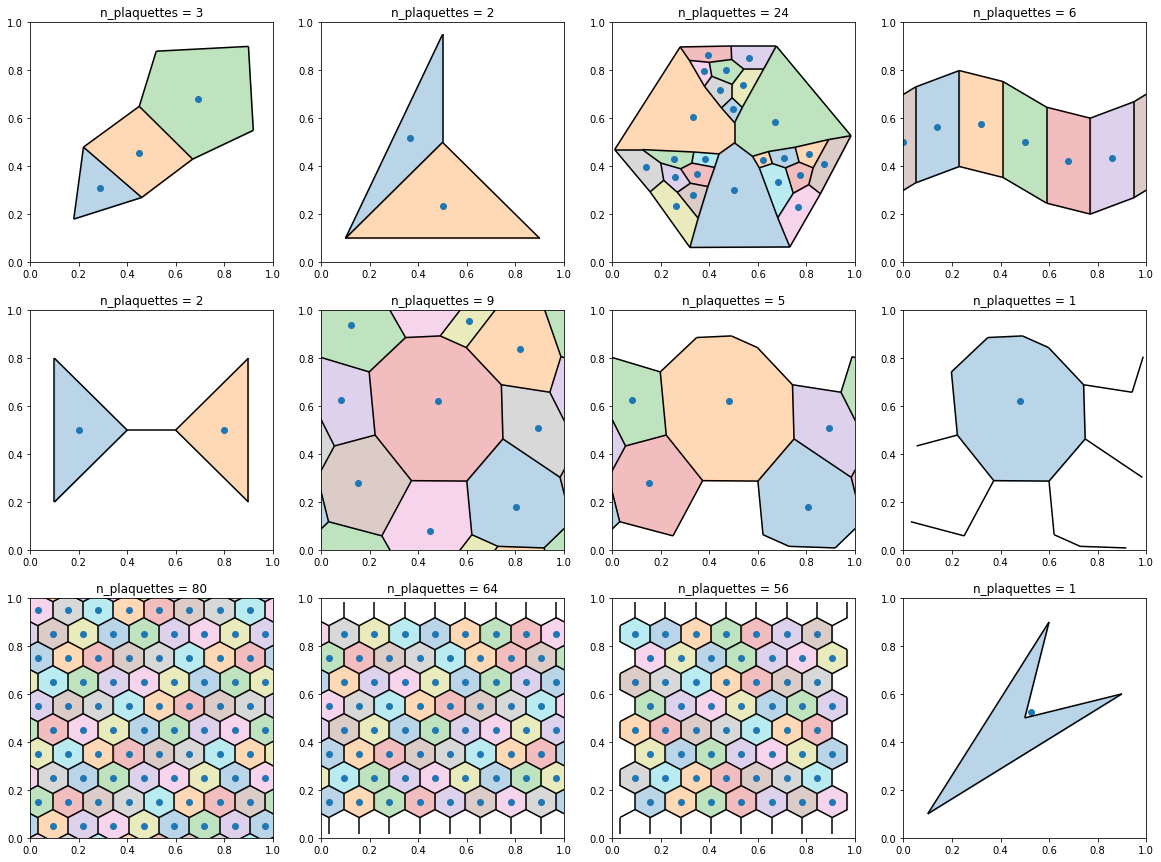

In [3]:
# now we plot the plaquettes

fig_width = 4
fig_depth = int(np.ceil(len(graphs)/fig_width))

width_size = 20
width_depth = (fig_depth*width_size)/fig_width

fig, axes = plt.subplots(fig_depth,4,figsize = (20,15))


for n,ax in enumerate(axes.flatten()[:len(graphs)]):

    ax.set_title('n_plaquettes = '+ str(graphs[n].n_plaquettes))
    plotting.plot_lattice(graphs[n], ax)

    cmap = plt.get_cmap("tab10")
    plaq_labels = np.arange(graphs[n].n_plaquettes)
    color_scheme = cmap(plaq_labels % 10)

    plotting.plot_plaquettes(graphs[n], plaq_labels, color_scheme = color_scheme, ax = ax, alpha = 0.3)

    centers = np.array([p.center for p in graphs[n].plaquettes])

    ax.scatter(centers[:,0], centers[:,1])
